## 3. Imputation Quality Experiment

In [138]:
from sklearn.decomposition import TruncatedSVD as TSVD, PCA
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sns

In [144]:
def load_data(doc, min_freq=5):
    df = pd.read_excel('%s/%s_by_lemma.xlsx' % (prepared_vectors_doc, doc), na_filter=False)
    good_trm = {trm for trm, ct in Counter(df.term).items() if ct >= min_freq}
    good_mrk = {mrk for mrk, ct in Counter(df.marker).items() if ct >= min_freq}
    # print(doc, len(good_mrk), len(df), len(np.load('%s/%s_by_lemma.npy' % (prepared_vectors_doc, doc))))
    X = np.load('%s/%s_by_lemma_0.npy' % (prepared_vectors_doc, doc))[df.term.isin(good_trm) & df.marker.isin(good_mrk)]
    df = df[df.term.isin(good_trm) & df.marker.isin(good_mrk)]
    y = np.array([r.marker for i,r in df.iterrows()])
    return df, X, y

In [146]:
def parallelize_crossvalidation(doc, classifier, nfolds = 20, verbose=True):
    df,X,y = load_data(doc, MIN_FREQ)
    accs = np.zeros(len(df))
    
    for i,(tr,ts) in enumerate(KFold(n_splits=min(len(X),nfolds), shuffle=True, random_state=100).split(X), start = 1):\
        classifier.fit(X[tr],y[tr])
        y_pred = classifier.predict(X[ts])
        accs[ts] = (y_pred == y[ts])
    df['accuracy'] = accs
    print(doc, np.mean(df['accuracy']))
    return df
    
def get_baseline(doc):
    df = pd.read_excel('./generated/doreco_bert/%s_by_lemma.xlsx' % doc, na_filter=False)
    correct = 0
    for term in df.term.unique():
        c = Counter(df[df.term == term].marker)
        correct += c.most_common(1)[0][1]
    return correct/len(df)

In [147]:
from datetime import datetime
#df_results['accuracy']
MIN_FREQ = 10
R = 0
# with Pool(14) as p:
#     dfs = p.starmap(parallelize_crossvalidation, ((doc, 5, True) for doc in doculects))
dfs = {}
for ci,classifier in {'knn' : KNeighborsClassifier(n_neighbors=5, weights='distance'),
                      'svc' : SVC(kernel='linear', C = 1, random_state=R),
                      'mlp-100': MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', random_state=R),
                      'mlp' : MLPClassifier(hidden_layer_sizes=(), activation='tanh', random_state=R)}.items():
    print(ci.upper())
    dfs[ci] = [parallelize_crossvalidation(doc, classifier, 10, True) for doc in doculects]
    pickle.dump(dfs[ci], open('./files/' + dataset + '_' + str(ci) + '_results.p', 'wb'))

KNN
apah1238 0.8768115942028986
anal1239 0.8111808328579578
arap1274 0.8480916030534351
beja1238 0.8374076179647527
cabe1245 0.8923728813559322
cash1254 0.8838071693448702
dolg1241 0.8836009174311926
even1259 0.8842676311030742
goem1240 0.8690340446326763
goro1270 0.8447142134547294
guri1247 0.8006088280060882
hoch1243 0.843871975019516
jeha1242 0.8709677419354839
jeju1234 0.8
kaka1265 0.7800397219463754
kama1351 0.8978697291137021
kark1256 0.8026830631637787
komn1238 0.7926978307363275
ligh1234 0.9370943584623065
ngal1292 0.9321808510638298
nngg1234 0.7976986471777329
pnar1238 0.891640866873065
ruul1235 0.8875562218890555
sadu1234 0.7467105263157895
sanz1248 0.9602446483180428
savo1255 0.9312796208530806
sout2856 0.9038295421825511
sumi1235 0.8278606965174129
svan1243 0.8641975308641975
taba1259 0.8786039453717754
teop1238 0.8483491885842194
texi1237 0.8476894639556377
trin1278 0.8379867744305658
urum1249 0.8740157480314961
vera1241 0.9056761268781303
warl1254 0.8787878787878788
SVC
a

/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


apah1238 0.9117259552042161


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


anal1239 0.865373645179692
arap1274 0.8870229007633588


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


beja1238 0.8658328595793064
cabe1245 0.9228813559322034


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


cash1254 0.9252163164400494
dolg1241 0.9271788990825688


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


even1259 0.919831223628692


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


goem1240 0.9084541456263235


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


goro1270 0.8980778958017198


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


guri1247 0.8508371385083714


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hoch1243 0.8508977361436377


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


jeha1242 0.923278116826504


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


jeju1234 0.823469387755102


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


kaka1265 0.8111552466070837
kama1351 0.9354782151310599


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


kark1256 0.8513135830072667


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


komn1238 0.84967919340055


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ligh1234 0.9600599101347979
ngal1292 0.9667553191489362


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


nngg1234 0.8267765510807028
pnar1238 0.8953560371517028


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ruul1235 0.9287856071964018


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


sadu1234 0.7883771929824561
sanz1248 1.0


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


savo1255 0.9644549763033176
sout2856 0.9260005758710049


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


sumi1235 0.8895522388059701


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


svan1243 0.897119341563786


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


taba1259 0.9059180576631259


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


teop1238 0.8897593732512591


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


texi1237 0.8835489833641405


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


trin1278 0.8780308596620132


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


urum1249 0.8938200906704844
vera1241 0.9440734557595993


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


warl1254 0.9087301587301587
MLP


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


apah1238 0.9057971014492754


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


anal1239 0.8579577866514546


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


arap1274 0.8874045801526718


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


beja1238 0.8695281409891984


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


cabe1245 0.9233050847457627


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


cash1254 0.92336217552534


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


dolg1241 0.9243119266055045


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


even1259 0.918625678119349


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


goem1240 0.9071510017918227


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


goro1270 0.8920080930703086


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


guri1247 0.8417047184170472


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hoch1243 0.8485558157689306


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


jeha1242 0.9197907585004359


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


jeju1234 0.8367346938775511


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


kaka1265 0.8128103277060575


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


kama1351 0.9332865784167617


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


kark1256 0.8479597540525433


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


komn1238 0.8463183623586923


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ligh1234 0.9595606590114828


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ngal1292 0.9627659574468085


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


nngg1234 0.824599595708288


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


pnar1238 0.8972136222910216


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ruul1235 0.9242878560719641


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


sadu1234 0.7894736842105263
sanz1248 0.9969418960244648


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


savo1255 0.9620853080568721


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


sout2856 0.9205298013245033


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


sumi1235 0.8796019900497513


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


svan1243 0.9012345679012346


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


taba1259 0.9044006069802731


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


teop1238 0.8869613878007835


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


texi1237 0.8839186691312384


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


trin1278 0.8758265980896399


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


urum1249 0.8945359102839417


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


vera1241 0.9424040066777963


/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/barend/yourvenvfoldername/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


warl1254 0.9069264069264069


In [149]:
from matplotlib import pyplot as plt
#
for k in dfs:
    df_global_results = pd.DataFrame({'doculects' : doculects})
    df_global_results['accuracy'] = [dfx.accuracy.mean() for dfx in dfs[k]]
    df_global_results['baseline'] = [get_baseline(doc) for doc in doculects]
    print(k,np.mean(df_global_results.accuracy), np.mean(df_global_results.baseline))
# sns.barplot(data=df_global_results, x='doculects', y='accuracy')
# sns.barplot(data=df_global_results, x='doculects', y='baseline')
# x = plt.xticks(rotation=90)

knn 0.8603175008855433 0.7299475927142146
svc 0.8862610383589791 0.7299475927142146
mlp-100 0.8965228484432656 0.7299475927142146
mlp 0.8947189195051585 0.7299475927142146


In [159]:
df_global_results = pd.DataFrame({'doculects' : doculects})
df_global_results['accuracy'] = [dfx.accuracy.mean() for dfx in dfs['mlp-100']]
df_global_results['baseline'] = [get_baseline(doc) for doc in doculects]


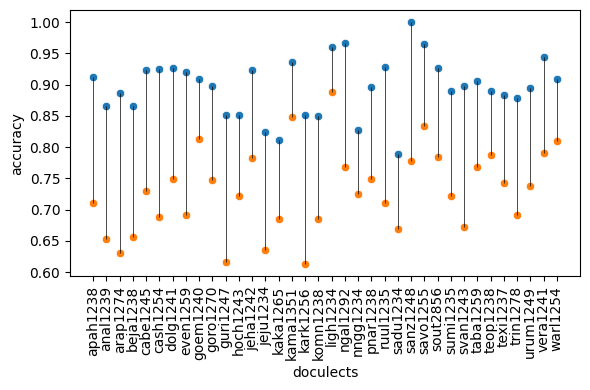

In [164]:
f1 = 'accuracy'
f2 = 'baseline'
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_global_results, x='doculects', y=f1)
sns.scatterplot(data=df_global_results, x='doculects', y=f2)
for i in range(len(df_global_results)):
    fmin, fmax = sorted([df_global_results.at[i,f1], df_global_results.at[i,f2]])
    plt.vlines(i, fmin,fmax, color='k', linewidth=0.5)
x = plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/home/xxxx/Dropbox/Apps/Overleaf/Inferred Lexification (SigTyp 2025)/latex/figures/%s.png' % f1)

## 5. create imputed dataframe

In [114]:
def get_offset_ft(corpus, doc, file, line, offset):
    line_fields = line.split('_')
    ln = ('%04d' % (int(line_fields[0]) + offset)) + '_' + '_'.join(line_fields[1:])
    try: return corpus[doc][file][ln]['ft']
    except KeyError: return '' 

imputed_data_builder = []
for doc in corpus:
    print(doc[:4], end =' ')
    df_doc, X, y = load_data(doc)
    df_doc['doculect'] = [doc[:-4]] * len(df_doc)
    Fm, F, Fp, T, G, M = zip(*[(
        get_offset_ft(corpus, doc, file, line, -1), corpus[doc][file][line]['ft'],
        get_offset_ft(corpus, doc, file, line, +1), corpus[doc][file][line]['tx'], 
        ' '.join('.'.join(m['G']) for m in corpus[doc][file][line]['gloss']),
        ' '.join('.'.join(m['M']) for m in corpus[doc][file][line]['gloss']))
                               for file,line in zip(df_doc.file, df_doc.line)])
    df_doc['ft-1'], df_doc['ft'], df_doc['ft+1'] = Fm, F, Fp
    df_doc['tx'], df_doc['gl'], df_doc['mr'] = T, G, M
    imputed_data_builder.append(df_doc)
imputed_data = pd.concat(imputed_data_builder)

anal apah arap bain beja bora cabe cash dolg even goem goro hoch jeha kaka kama kark komn lowe movi ngal nisv nngg nort nort orko pnar port resi ruul sadu sanz savo sout sout sumi svan taba teop texi trin tsim urum vera yong yuca yura 

In [115]:
imputed_data.sample(30)

,Unnamed: 0,term,doculect,file,line,marker,ft-1,ft,ft+1,tx,gl,mr
968,968,teach,hoch1243,doreco_hoch1243_ED_05,0024_DoReCo_doreco_hoch1243_ED_05,gigus,"I had to do housework, that's the way it is, s...",she taught me a lot of things and I always con...,"I'm not supposed to mess my life up, that's wh...",hegų wažąra roohąxjį hįgigųsregi heesge...,that.way something.NMLZ a.lot.INTS 1E.U.teach....,hegų wažą.=ra roohą.=xjį hį-.gigųs.=reg...
5710,5710,turn,sout3282,doreco_sout3282_mc_english_kent02_b,0043_DoReCo_doreco_sout3282_mc_english_kent02_b,^turn,Yes.,"Oh, yes, we used to turn them out.",,oh yes we used to turn them out,,
537,537,water,movi1243,doreco_movi1243_EAO-vibora,0138_DoReCo_doreco_movi1243_EAO-vibora,:mi,I took one sppon and,I mixed it so that warmed up... in the water a...,three drips of that...,ala:kwa bo oj veyo'niwa'is nij to:mi che jayna...,mix REAS ART.N.PST warm.PRC.NMZ.3PL.AB water ...,ala:kwa bo os veyo'.-ni.-wa.=is to:mi che ye...
1871,1871,rat,nisv1234,doreco_nisv1234_T5_15-12-2013_Levetbao_Aven_Nh...,0017_DoReCo_doreco_nisv1234_T5_15-12-2013_Leve...,hasu$,Then they go and...,"They go, the rat has already climbed into the ...","He eats away at the falling papaya, the bird l...",ara=van nhasu a=sah nabrav_sabat moq-i,3pl.go rat 3SG.climb breadfruit Asp.f.Intruder,"ara.van, nhasu a.sah nabrav_sabat moq.i."
1536,1536,go,beja1238,doreco_beja1238_BEJ_MV_NARR_56_dove,0005_DoReCo_doreco_beja1238_BEJ_MV_NARR_56_dove,gi:g,to her children:,when she was going,this sorghum is ripe,giːgtihoːb oːdoːr,leave.AOR.3SG.F.when DEF.SG.M.ACC.time,giːg.-ti.=hoːb oː=.doːr
2163,2163,leave,goem1240,doreco_goem1240_Kur,0089_DoReCo_doreco_goem1240_Kur,^nyet$,Everybody removed his feather. Okay.,They left the tortoise (and he) lay there.,"They just rose (and) descended, then onto the ...",m�ep nyet k'ur t'o d'i,3Pl.S leave tortoise lie LOC.ANAPH,m�ep nyet k'ur t'o d'i
6858,6858,today,sout3282,doreco_sout3282_mc_english_devon01,0107_DoReCo_doreco_sout3282_mc_english_devon01,^today$,,"Well, that's what makes you feel sorry for the...",,well that's what makes you feel sorry for thes...,,
6596,6596,sister,sout3282,doreco_sout3282_mc_english_london01_b,0052_DoReCo_doreco_sout3282_mc_english_london...,^sister,,"Yeah. Anyway, we're in Stamps', there's Bobby ...",,yeah anyway we're in stamps there's bobby stam...,,
2479,2479,man,texi1237,doreco_texi1237_LaMujerFloja,0114_DoReCo_doreco_texi1237_LaMujerFloja,^paan,He started feeding him.,"The man finished eating, everything",and [also] the woman . They already ate both.,maʔye wiʔk jepeʔ pääñ byumbe,PFV.already eat this man 3.A.all,"ma'.-ye wê'k jepe' pääñ, y-.bumbe"
1612,1612,many,orko1234,doreco_orko1234_ET1_2,0036_DoReCo_doreco_orko1234_ET1_2,^mele$,"the wind was really strong, it made",it hit many trees,,tesie liē yēl tee lon mēle nga bur,3SG.NREC.PST.hit tree 3PL 3SG.NREC.PST,te=.sie liē yēl te=


In [109]:
ft_per_m = {}
for doci in corpus:
    print('load ft_per_m for %s' % doci[:-4])
    dfi, Xi, yi = load_data(doci)
    ft_per_m[doci] = {}
    for marker in dfi.marker.unique():
        ft_per_m[doci][marker] = set(dfi[dfi.marker == marker].term.unique())

load ft_per_m for anal1239
load ft_per_m for apah1238
load ft_per_m for arap1274
load ft_per_m for bain1259
load ft_per_m for beja1238
load ft_per_m for bora1263
load ft_per_m for cabe1245
load ft_per_m for cash1254
load ft_per_m for dolg1241
load ft_per_m for even1259
load ft_per_m for goem1240
load ft_per_m for goro1270
load ft_per_m for hoch1243
load ft_per_m for jeha1242
load ft_per_m for kaka1265
load ft_per_m for kama1351
load ft_per_m for kark1256
load ft_per_m for komn1238
load ft_per_m for lowe1385
load ft_per_m for movi1243
load ft_per_m for ngal1292
load ft_per_m for nisv1234
load ft_per_m for nngg1234
load ft_per_m for nort2641
load ft_per_m for nort2875
load ft_per_m for orko1234
load ft_per_m for pnar1238
load ft_per_m for port1286
load ft_per_m for resi1247
load ft_per_m for ruul1235
load ft_per_m for sadu1234
load ft_per_m for sanz1248
load ft_per_m for savo1255
load ft_per_m for sout2856
load ft_per_m for sout3282
load ft_per_m for sumi1235
load ft_per_m for svan1243
l

In [143]:
def parallelize_imputation(doci):
    classifier = pickle.load(open('%s/model_%s.p' % (te_folder, doci[:-4]), 'rb'))
    dfi, Xi, yi = load_data(doci)
    ft_doci = set(dfi.term.unique())
    #
    imputed_terms, ft_present = [],[]
    for docj in corpus:
        print('  %s -- %s' % (doci[:-4], docj[:-4]), datetime.now())
        if docj == doci: 
            imputed_terms.extend(yi)
            ft_present.extend([True]*len(yi))
        else:
            dfj, Xj, yj = load_data(docj)
            y_pred = classifier.predict(Xj)
            imputed_terms.extend(y_pred)
            ft_present.extend([ft_per_m[docj][marker] & ft_doci != set() for marker in dfj.marker])
    #imputed_data['imputed_%s' % doci[:-4]] = imputed_terms
    #imputed_data['ft_present_%s' % doci[:-4]] = ft_present
    print(doci, len(imputed_terms), len(ft_present))
    return imputed_terms, ft_present

In [144]:
from multiprocessing import Pool
with Pool(14) as p:
    results = p.map(parallelize_imputation, sorted(corpus))

  cabe1245 -- anal1239 2024-03-22 17:23:49.999991
  hoch1243 -- anal1239 2024-03-22 17:23:50.214624
  bain1259 -- anal1239 2024-03-22 17:23:50.293642
  goro1270 -- anal1239 2024-03-22 17:23:50.313986
  apah1238 -- anal1239 2024-03-22 17:23:50.445309
  jeha1242 -- anal1239 2024-03-22 17:23:50.505567
  anal1239 -- anal1239 2024-03-22 17:23:50.679473
  anal1239 -- apah1238 2024-03-22 17:23:50.690568
  even1259 -- anal1239 2024-03-22 17:23:50.956524
  cash1254 -- anal1239 2024-03-22 17:23:51.003436
  goem1240 -- anal1239 2024-03-22 17:23:51.219537
  arap1274 -- anal1239 2024-03-22 17:23:51.321563
  beja1238 -- anal1239 2024-03-22 17:23:51.353693
  cabe1245 -- apah1238 2024-03-22 17:23:51.523189
  dolg1241 -- anal1239 2024-03-22 17:23:51.616302
  bora1263 -- anal1239 2024-03-22 17:23:52.284707
  cabe1245 -- arap1274 2024-03-22 17:23:52.531464
  bain1259 -- apah1238 2024-03-22 17:23:53.833830
  cabe1245 -- bain1259 2024-03-22 17:23:54.002655
  goro1270 -- apah1238 2024-03-22 17:23:54.328346


In [145]:
for doc,(it,ft) in zip(sorted(corpus),results):
    imputed_data['imputed_%s' % doc[:-4]] = it
    imputed_data['ft_present_%s' % doc[:-4]] = ft

In [146]:
imputed_data.to_excel('%s/imputed_data.xlsx' % (te_folder))

In [147]:
imputed_data.columns

Index(['Unnamed: 0', 'term', 'doculect', 'file', 'line', 'marker', 'ft-1',
       'ft', 'ft+1', 'tx',
       ...
       'imputed_tsim1256', 'ft_present_tsim1256', 'imputed_urum1249',
       'ft_present_urum1249', 'imputed_vera1241', 'ft_present_vera1241',
       'imputed_yong1270', 'ft_present_yong1270', 'imputed_yuca1254',
       'ft_present_yuca1254'],
      dtype='object', length=106)

In [148]:
imputed_data.sample(10)

,Unnamed: 0,term,doculect,file,line,marker,ft-1,ft,ft+1,tx,...,imputed_tsim1256,ft_present_tsim1256,imputed_urum1249,ft_present_urum1249,imputed_vera1241,ft_present_vera1241,imputed_yong1270,ft_present_yong1270,imputed_yuca1254,ft_present_yuca1254
2240,2240,find,beja1238,doreco_beja1238_BEJ_MV_NARR_17_shoemaker,0105_DoReCo_doreco_beja1238_BEJ_MV_NARR_17_sho...,sin,"I put them down,","every morning I found them sewn.""","when he says : "" All the people come and buy t...",faʤilka amheːjda isinneːb,...,hit$,False,^gatir,True,^sier$,True,^sidzi-thaeqo$,False,^taas,False
6328,6328,judge,beja1238,doreco_beja1238_BEJ_MV_NARR_14_sijadok,0052_DoReCo_doreco_beja1238_BEJ_MV_NARR_14_sij...,^iga:d,She went back to her daughters and,"""The judge told me these words,",until tomorrow,igaːd eːn jʔadim idheːb,...,ng'ad,False,^girih_sirigi$,False,^'ama,False,^thv-v<dzo>[-ki$,False,^geerra$,False
2285,2285,say,kama1351,doreco_kama1351_PKZ_196X_SU0215,0130_DoReCo_doreco_kama1351_PKZ_196X_SU0215,^ma,"My mother started cooking meat, feed them.",And I say: to go or not to go?,"""If you want, go, if you don't want, don't go.",a măn mălliam: kanzittə ilʼi ej kanzittə,...,ey,True,^dii,True,^tek$,True,w-tsw$,True,ya'al,True
1228,1228,girl,kark1256,doreco_kark1256_D13GAKFarming,0246_DoReCo_doreco_kark1256_D13GAKFarming,^tee,yes and that is what is called,"when they betroth you a girl, the day you agre...",for example today,ma t̪ɛɛr ʊʊ t̪ɔmbʊlnʊʊl ma t̪ɛɛr i̠ŋgɪl ʊ t̪ɔd...,...,^hu,True,^giz,True,^rene,True,^mvzo,True,^taankelemo'ono$,False
17875,17875,hard,kama1351,doreco_kama1351_PKZ_196X_SU0210,0042_DoReCo_doreco_kama1351_PKZ_196X_SU0210,^sedem$,"Today I'm not working, I'm speaking with you.","Although it's not hard, I'm very tired.",It rains hard.,xotʼ ej sedem a tararluʔpiem ugandə,...,bur,False,^catin,True,^babarak$,True,^sidzi-thaeqo$,True,^meyaj,False
311,311,go,sout3282,doreco_sout3282_mc_english_kent01,0049_DoReCo_doreco_sout3282_mc_english_kent01,^going$,,"So, as I was going in Ashford Market I'd been ...",,so as i was going in ashford market i'd been w...,...,gaw,True,^gid,True,^van,True,bi,True,^kana,False
9097,9097,buy,kama1351,doreco_kama1351_PKZ_196X_SU0224,0153_DoReCo_doreco_kama1351_PKZ_196X_SU0224,^ibi?i$,"He went into the house, they went into the hou...","She lived very well, they bought all sort of t...","Then they bought her boots, [they are] beautif...",bar ugandə noise dĭʔnə jakše molambi ešši ge b...,...,kwal,False,^kas,False,^babarak$,False,^sidzi-thaeqo$,False,^yuum,False
5657,5657,stay,beja1238,doreco_beja1238_BEJ_MV_NARR_25_ORPHAN,0169_DoReCo_doreco_beja1238_BEJ_MV_NARR_25_ORPHAN,:st?,He said : ' No way! I am not a man who runs aw...,"he stays, they said.",The snake was coming and,eːstʔeː eːn,...,afta,True,^dur,True,'og,True,^le-zi-,False,^kux,False
214,214,say,bora1263,doreco_bora1263_mc_bora_ajyuwa,0013_DoReCo_doreco_bora1263_mc_bora_ajyuwa,^ne,"That is why, one day she told her daughter "" A...","But she said "" Yes, I do not know who comes to...",,árónáa neélle éée tsá o wáájácutú múha pejco t...,...,^gway$,True,^dedi,True,^so$,True,^pi,True,^ki,True
1760,1760,see,komn1238,doreco_komn1238_tci20130823a-08,0034_DoReCo_doreco_komn1238_tci20130823a-08,.ma.r,they will come here,they saw alen,his uncles,ʔa.len sa.ma.rath,...,^qada,True,^gor,True,'en$,True,do,True,^taas,False


In [ ]:
term_extensions = defaultdict(lambda : {})
for c,m in imputed_values.items():
    for l in m.columns[1:]:
        for t in m[l].unique():
            if isinstance(t,str):
                term_extensions[l,t][c] = m[l] == t

In [ ]:
for l,t in list(term_extensions):
    polyseme_graph = nx.Graph()
    polyseme_graph.add_nodes_from(term_extensions[l,t].keys())
    for e1,e2 in combinations(sorted(term_extensions[l,t]),2):
        if len(colexification_pairs[e1,e2]) > 1:
            polyseme_graph.add_edge(e1,e2)
    if nx.number_connected_components(polyseme_graph) == 1: continue
    for ci,c in enumerate(nx.connected_components(polyseme_graph)):
        for cx in c:
            term_extensions[l,t + '-' + str(ci+1)][cx] = term_extensions[l,t][cx]
    del term_extensions[l,t]
            

In [ ]:
print(len(term_extensionstensions))

In [ ]:
np.set_printoptions(precision=2)
strip_index = lambda k : k.split('-')[0]
model = {}
for l,t in sorted(term_extensions):
    df = pd.concat([imputed_values[c][term_extensions[l,t][c]] for c in term_extensions[l,t]])
    #if len(term_extensions[l,t]) == 1: continue
    df_long = short_to_long(df[df.columns[1:]]) 
    try:
        model[l,t] = {'pca' : PCA()}
        model[l,t]['coo'] = model[l,t]['pca'].fit_transform(df_long.to_numpy())
        good_pc = next((i for i,e in enumerate(model[l,t]['pca'].explained_variance_) if e < 1),0)
        if good_pc == 0:
            del model[l,t]
            continue
        model[l,t]['coo'] = model[l,t]['coo'][:,:max(2,good_pc)]
        print(l,t,list(term_extensions[l,t]), len(df), good_pc)
    except: continue
pickle.dump(model, open('pca_models.p','wb'))

In [ ]:
print(len(model))
print(Counter([sum(v['pca'].explained_variance_ >= 1) for v in model.values()]))

In [ ]:
corpus_size = {d : sum(len(ei) for ei in bitexts[d][1]) for d in bitexts}

In [ ]:
conc_data = pd.read_excel('../metaphor/bert_exploration/13428_2013_403_MOESM1_ESM.xlsx')
conc_dict = {r.Word : r['Conc.M'] for i,r in conc_data.iterrows()}

In [ ]:
def colex(coo_h, terms_h, k=3):
    ordered = coo_h.argsort()
    return int(Counter(terms_h[ordered[:k]]).most_common(1)[0][0] == 
               Counter(terms_h[ordered[len(ordered)-k:]]).most_common(1)[0][0])

In [ ]:
builder = []
for (l,t) in sorted(model):
    terms = [k for k in term_extensions[l,t].keys()]
    conc_score = np.mean([conc_dict[term[:-2]] for term in terms if term[:-2] in conc_dict])
    coo, pca = model[l,t]['coo'], model[l,t]['pca']
    df_orig = pd.concat([original_values[term][term_extensions[l,t][term]] for term in terms])
    df_imput = pd.concat([imputed_values[term][term_extensions[l,t][term]] for term in terms])
    print(l,t,terms,conc_score, len(df_imput))
    coo_scaled = MinMaxScaler(feature_range=(-1,1)).fit_transform(coo)
    n_good_dims = sum(pca.explained_variance_ >= 1)
    #print(l.upper(), t.upper(), '\t', n_good_dims, pca.explained_variance_[:5], pca.explained_variance_ratio_[:5])
    good_docs = [d for d,v in df_orig.value_counts('doculect').items() if v >= 10]
    wpms = {d : np.log(1e6*sum(df_orig.doculect==d)/corpus_size[d]) for d in good_docs}
    wpm_m, wpm_s = np.mean(list(wpms.values())), np.std(list(wpms.values()))
    #
    for dim in range(n_good_dims):
        hits = {d : (df_orig.doculect==d).to_numpy() for d in good_docs}
        good_docs_d = [d for d in good_docs if sum(coo[hits[d],dim] < 0) > 0 and sum(coo[hits[d],dim] > 0) > 0]
        #skew_dir = -1 if skew(coo[:,dim]) < 0 else 1
        #mean_dir = -1 if np.mean(np.mean(coo[df.doculect==d,dim]) for d in good_docs_d) < 0 else 1
        
        print('  DIM %d: N bad docs = %d, N good docs = %d' % 
              (dim, len(good_docs)-len(good_docs_d), len(good_docs_d)))
        indeps = {}
#         indeps['spread_mean'] = { d : abs(np.mean(coo_scaled[hits[d],dim])) for d in good_docs_d}
        indeps['spread_sd'] = { d : np.std(coo_scaled[hits[d],dim]) for d in good_docs_d }
#         indeps['spread_skew'] = { d : abs(skew(coo[hits[d],dim])) for d in good_docs_d }
#         indeps['spread_kurtosis'] = { d : kurtosis(coo[hits[d],dim]) for d in good_docs_d }
        #
        ms = {k : (np.mean(list(v.values())), np.std(list(v.values()))) for k,v in indeps.items()}
        
        for doc in sorted(good_docs_d):
            h = (df_orig.doculect==doc).to_numpy()
            if len(df_orig[h].term.unique()) == 1: IG, IGR = 0, 0
            else:
                d = DecisionTreeClassifier(max_depth=1,criterion="entropy")
                d.fit(coo[h,dim].reshape(-1,1), df_orig[h].term)
                H_start = d.tree_.impurity[0]
                p_left = sum(coo[h,dim] < d.tree_.threshold[0])/sum(h)
                H_new = (p_left * d.tree_.impurity[1]) + ((1-p_left) * d.tree_.impurity[2])
                IG = H_start - H_new
                IGR = IG/H_start
            #            
            builder.append({'term' : t, 'orig_doculect' : l,
                            'doculect' : doc, 'PC' : dim, 'IG' : IG, 'IGR' : IGR,
                            'nTermTypes' : len(df_orig[h].term.unique()), 'nTermTokens' : sum(h),
                            'nFieldTypes' : len(terms),
                            'wpm' : wpms[doc], 'wpm_z' : (wpms[doc]-wpm_m)/wpm_s,
                            'concreteness' : conc_score, 'ev' : pca.explained_variance_[dim],
                            'colexifies_1' : colex(coo[h,dim], df_orig[h].term.to_numpy(), k=1),
                            'colexifies_3' : colex(coo[h,dim], df_orig[h].term.to_numpy(), k=3),
                            'colexifies_5' : colex(coo[h,dim], df_orig[h].term.to_numpy(), k=5)})
            for k in indeps:
                builder[-1][k] = indeps[k][doc]#(indeps[k][doc]-ms[k][0])/ms[k][1]

In [ ]:
from scipy.stats import pearsonr
from itertools import product
from scipy.stats.mstats import zscore

import statsmodels.api as sm
from statsmodels.formula.api import ols, logit
from statsmodels.graphics.api import interaction_plot, abline_plot

In [ ]:
X = [ 'spread_sd', 'wpm', 'concreteness']
Y = ['IG','colexifies_3']
df_result = pd.DataFrame(builder)
for v in X+Y[:1]: df_result[v] = zscore(df_result[v])

In [ ]:
sns.heatmap(df_result[X].corr(), cmap='vlag', vmin=-1, vmax=1, annot=True);

In [ ]:
dfi = df_result#[df_result.nFieldTypes>1]
y = 'colexifies_3'
print(dfi.value_counts(y))
lm = logit('%s ~  spread_sd + wpm + concreteness' % y, dfi).fit()
print(lm.summary())

In [ ]:
# manual example of dealing with odds ratios
sd = 0
z = -0.2 + (sd * -0.59) #+ (sk * 1.06)
p = 1 / (1 + np.exp(-z))
print(p)

In [ ]:
from scipy.stats import ttest_ind
dataslices = {'all' : df_result, 
              'pc0' : df_result[df_result.PC == 0]}
y = 'colexifies_3'
for x in X + ['nFieldTypes']:
    for k,dfi in dataslices.items():
        t,p = ttest_ind(dfi[dfi[y]==0][x], dfi[dfi[y]==1][x])
        print('%s~%s for %s: t=%.3f, p=%.3f' % (y,x,k, t,p))
        sns.boxplot(data=dfi, x = y, y = x)
        plt.show()

In [ ]:
dfi = df_result
lm = ols('IG ~ spread_sd + wpm + concreteness', dfi).fit()
print(lm.summary())

In [ ]:
dataslices = {'all' : df_result, 
              'pc0' : df_result[df_result.PC == 0], 'pc+' : df_result[df_result.PC != 0]}
y = 'IG'
for x in X + ['nFieldTypes']:
    for k,dfi in dataslices.items():
        if k != 'all': continue
        r,p = pearsonr(dfi[x], dfi[y])
        print('%s~%s for %s: r=%.3f, p=%.3f' % (y,x,k, r,p))
        sns.regplot(data=dfi, x = x, y = y, scatter_kws={'s':10,'color':'#606060'}, line_kws={'lw':3,'color':'r'})
        plt.show()

In [ ]:
for (l,t) in model:
    terms = [k for k in term_extensions[l,t].keys()]
    conc_score = np.mean([conc_dict[term[:-2]] for term in terms if term[:-2] in conc_dict])
    coo, pca = model[l,t]['coo'], model[l,t]['pca']
    df_orig = pd.concat([original_values[term][term_extensions[l,t][term]] for term in terms])
    df_imput = pd.concat([imputed_values[term][term_extensions[l,t][term]] for term in terms])
    print(l,t,terms,conc_score, len(df_imput))
    coo, pca = model[l,t]['coo'], model[l,t]['pca']
    n_good_dims = sum(pca.explained_variance_ >= 1)
    good_docs = [d for d,v in Counter(dict(df_orig.value_counts('doculect'))).items() if v >= 10]
    #
    nrows = max(1,(len(good_docs)+3)//4)
    for dim in range(n_good_dims):
        print('\t', dim)
        plt.figure(figsize=(35,8*nrows))
        fig, axs = plt.subplots(nrows=nrows, ncols=4, squeeze=False, sharex=True, sharey=True, figsize=(30,7*nrows))
        #fig.title('%s; PC%d' % (ts, dim+1))
        hits = {d : (df_orig.doculect==d).to_numpy() for d in good_docs}
        good_docs_d = [d for d in good_docs if sum(coo[hits[d],dim] < 0) > 0 and sum(coo[hits[d],dim] > 0) > 0]
        #
        for i,doc in enumerate(good_docs):
            b = next((b for b in builder if b['term'] == t and b['orig_doculect'] == l and b['doculect'] == doc),None)
            h = (df_orig.doculect==doc).to_numpy()
            if sum(h) == 0: continue
            tcs = ' '.join('%s (%d)' % x for x in 
                           Counter(dict(df_orig[h].value_counts('term').items())).most_common(3))
            
            sns.scatterplot(x=coo[h,dim], y=coo[h,(1 if dim == 0 else 0)], hue=df_orig[h]['term'], ax=axs[i//4,i%4]) 
            axs[i//4,i%4].legend(fontsize=20)
            try: axs[i//4,i%4].set_title('%s; good=%d; C=%d; SD=%.2f; WM=%.2f' % 
                                    (doc, doc in good_docs_d, b['colexifies_3'], b['spread_sd'], b['wpm']))
            except: axs[i//4,i%4].set_title('%s; good=%d' % (doc, doc in good_docs_d))
        if not os.path.isdir('figures/%s/' % '-'.join(c[:-2] for c in terms)):
            os.mkdir('figures/%s/' % '-'.join(c[:-2] for c in terms))
        plt.savefig('figures/%s/%s_%s_%d.jpeg' % 
                    ('-'.join(c[:-2] for c in terms), l[:-4], t, dim+1), transparent=False)
        plt.clf()

even1259.csv ^wa ['kill_l'] 3.9 806
	 0
even1259.csv alij$ ['small_l'] 3.22 85
	 0
even1259.csv b@j@ ['man_l', 'people_l', 'person_l'] 4.776666666666666 3945
	 0
	 1
even1259.csv har@ ['know_l'] 1.68 1491
	 0
even1259.csv kann ['young_l'] 3.16 19
	 0
even1259.csv ll-1 ['tell_l'] 2.9 676
	 0
	 1
even1259.csv mon ['leave_l'] 2.53 56
	 0
even1259.csv nganis ['old_l'] 2.72 47
	 0
even1259.csv nguk ['ask_l'] 2.52 471
	 0
even1259.csv rgani ['day_l'] 3.92 972
	 0
even1259.csv tirk-1 ['old_l'] 2.72 395
	 0
even1259.csv up ['take_l'] 3.06 301
	 0
	 1
even1259.csv uru ['go_l', 'take_l', 'leave_l'] 2.9133333333333336 4158
	 0
	 1
even1259.csv wun@ ['make_l'] 2.67 227
	 0
goem1240.csv ^an$ ['think_l'] 2.41 573
	 0
	 1
goem1240.csv ^b'en$ ['look_l'] 2.96 49
	 0
goem1240.csv ^bi$ ['thing_l', 'way_l'] 2.755 1034
	 0
	 1
goem1240.csv ^doe$ ['come_l'] 2.72 4313
	 0
goem1240.csv ^gurum$ ['man_l', 'person_l'] 4.755 753
	 0
goem1240.csv ^jap$ ['child_l'] 4.78 1604
	 0
	 1
goem1240.csv ^mang$ ['take_l'] 3

kama1351.csv ^so ['come_l'] 2.72 4313
	 0
kama1351.csv ^surar ['ask_l'] 2.52 471
	 0
kama1351.csv ^ten ['think_l'] 2.41 573
	 0
	 1
kama1351.csv ^timn ['know_l'] 1.68 1499
	 0
kama1351.csv ^tur ['house_l'] 5.0 1268
	 0
kama1351.csv abi ['do_l', 'make_l'] 2.565 787
	 0
	 1
kama1351.csv akt@$ ['old_l'] 2.72 110
	 0
kama1351.csv bu-1 ['person_l', 'man_l'] 4.755 1696
	 0
kama1351.csv bu-2 ['river_l', 'water_l'] 4.945 930
	 0
kama1351.csv d'abakt@r ['talk_l', 'speak_l'] 3.8850000000000002 1058
	 0
kama1351.csv d'u-1 ['little_l', 'small_l'] 3.4450000000000003 690
	 0
kama1351.csv dava ['start_l', 'begin_l'] 2.635 649
	 0
kama1351.csv kola ['fish_l', 'dry_l'] 4.385 538
	 0
	 1
kama1351.csv kubi ['see_l', 'find_l'] 2.92 2250
	 0
	 1
kama1351.csv lunk ['hole_l'] 4.81 17
	 0
kama1351.csv ma: ['leave_l'] 2.53 322
	 0
kama1351.csv star ['old_l'] 2.72 831
	 0
kama1351.csv t'i ['way_l', 'road_l'] 3.545 356
	 0
kama1351.csv tibi ['man_l', 'marry_l', 'husband_l'] 3.9766666666666666 713
	 0
	 1
	 2
kam

In [ ]:
for (l,t) in model:
    terms = [k for k in term_extensions[l,t].keys()]
    conc_score = np.mean([conc_dict[term[:-2]] for term in terms if term[:-2] in conc_dict])
    coo, pca = model[l,t]['coo'], model[l,t]['pca']
    df_orig = pd.concat([original_values[term][term_extensions[l,t][term]] for term in terms])
    df_imput = pd.concat([imputed_values[term][term_extensions[l,t][term]] for term in terms])
    print(l,t,terms,conc_score, len(df_imput))
    coo, pca = model[l,t]['coo'], model[l,t]['pca']
    n_good_dims = sum(pca.explained_variance_ >= 1)
    good_docs = [d for d,v in Counter(dict(df_orig.value_counts('doculect'))).items() if v >= 10]
    #
    wpms = {d : np.log(1e6*sum(df.doculect==d)/corpus_size[d]) for d in good_docs}
    wpm_m, wpm_s = np.mean(list(wpms.values())), np.mean(list(wpms.values()))
    #
    character = {}
    for dim in range(n_good_dims):
        hits = {d : (df.doculect==d).to_numpy() for d in good_docs}
        good_docs_d = [d for d in good_docs if sum(coo[hits[d],dim] < 0) > 0 and sum(coo[hits[d],dim] > 0) > 0]
        dimmin, dimmax = (coo[:, dim].min(),coo[:,dim].max())
        labels = np.array(['0', '-', '+'])
        character['PC%d' % dim] = labels[(coo[:,dim] < dimmin + (1 * (dimmax-dimmin)/4)).astype(int) + 
                                         2*(coo[:,dim] > dimmin + (3 * (dimmax-dimmin)/4)).astype(int)]
    
    df_t = pd.DataFrame(character)
    builder_r = []
    for i,r in df_orig.iterrows():
        builder_r.append({x : ' '.join(map(lambda x : (x if isinstance(x,str) else '.'.join(x)),
                                           corpus[r.doculect][r.file][r.line][x]))
                          for x in ['wr', 'mr', 'gl']})
        builder_r[-1]['ft'] = corpus[r.doculect][r.file][r.line]['ft'
                                                                ]
        builder_r[-1]['i'] = i
        builder_r[-1]['doculect'] = r.doculect
        builder_r[-1]['file'] = r.file
        builder_r[-1]['line'] = r.line
    df_t = pd.concat([df_t, pd.DataFrame(builder_r)], axis=1)
    df_t.to_excel('./data/hits/%s.xlsx' % ts)

In [ ]:
dimmin

In [ ]:
(coo[:,dim] < (dimmin + (1 * (dimmax-dimmin)/4))).astype(int)[:90],2* (coo[:,dim] > (dimmin + (3 * (dimmax-dimmin)/4))).astype(int)[:90]
    

In [ ]:
# c = 'say_l'
# m = imputed_values[c]
# ct = Counter()
# for i,r in enumerate(m.to_numpy()):
#     key = ' '.join(map(lambda x : x[:3], r[1:]))
#     ct[key] += 1

# ct.most_common()

In [ ]:
# # compile sparse matrix
# st = datetime.now()
# from scipy.sparse import csc_matrix, csr_matrix
# #
# graphs = {}
# for c in good_concepts[::-1]:
#     if c != 'land_l': continue
#     lab_indices = {}
#     sit_indices = {}
#     rows, cols = [], []
#     m = imputed_values[c]
#     m_unique = {}
#     for i,r in enumerate(m.to_numpy()):
#         key = tuple([(ci,ri) for ci,ri in zip(m.columns[1:], r[1:])])
#         m_unique[key] = m_unique.get(key, []) + [i]
#     for k,V in m_unique.items():
#         csc_i = sit_indices[c,k] = len(sit_indices)
#         for ci,ri in k:
#             try: lab_i = lab_indices[ci,ri]
#             except KeyError: lab_i = lab_indices[ci,ri] = len(lab_indices)
#             rows.append(csc_i); cols.append(lab_i)
#     m_csr = csc_matrix(((np.ones(len(rows)), (cols, rows))))
#     print(c, m_csr.shape)
#     V, E, Ew = build_semantic_map(m_csr)
#     print(c, len(V), len(E))


In [ ]:
# neighbouring_fields = for c in good_concepts:
#     pos = [i for k,i in sit_indices.items() if k[0] == c]
#     neg = [i for k,i in sit_indices.items() if k[0] != c]
#     endo = int(m_csrx[pos].dot(m_csrx[pos].T).min())
#     exo = int(m_csrx[pos].dot(m_csrx[neg].T).max())
#     print(c, endo, exo)
#     if endo < exo:
#         exo_hits = set((m_csrx[pos].dot(m_csrx[neg].T) > max(endo,1)).nonzero()[1])
#         exo_concepts = {c for (c,ti),i in sit_indices.items() if i in exo_hits}
#         field_mergers.add_edges_from((c,e) for e in exo_concepts)
#         print(exo_concepts)
#     exo_hits = set((m_csrx[pos].dot(m_csrx[neg].T) > 1).nonzero()[1])
#     exo_concepts = {c for (c,ti),i in sit_indices.items() if i in exo_hits}
#     print('!', exo_concepts)

In [ ]:
# for c in list(nx.connected_components(field_mergers))[::-1]:
#     pos = [i for k,i in sit_indices.items() if k[0] in c]
#     print(c, len(pos))
#     m_csr_c = m_csr[:,pos]
#     print(m_csr_c.shape)
#     #V, E, Ew = build_semantic_map(m_csr_c)

In [ ]:
# def C(constraints, E):
#     cost = 0
#     for S in constraints:
#         cost += (1-ncc(set(S.nonzero()[1]), E) if S.nnz > 0 else 0)
#     return cost

# def ncc(S, E):
#     cc = 0
#     explored = set()
#     for v in S:
#         if v in explored: continue
#         else: cc += 1
            
#         frontier = [v]
#         while len(frontier) > 0:
#             u = frontier.pop()
#             if u in explored: continue
#             explored.add(u)
#             if u not in E: continue
#             frontier.extend(list(S.intersection(E[u])))
#     #print('\t',S, E, cc)

#     return cc

# def find_edges(constraints):
#     # determine possible edges
#     x = constraints.T.dot(constraints)
#     x2 = (x > 1)
#     V2c = Counter()
#     for i in range(x2.shape[1]):
#         for j in x2[:i,i].nonzero()[0]:
#             V2c[i,j] = x[i,j]
#     V2 = set(V2c)
#     print('n edges', len(V2))
#     # initialize edges and weight
#     E = { i : set() for i in np.arange(x.shape[0])}
#     E_weight = {}
#     #
#     total_cost = C(constraints, E)
#     last_best_decrease = max(V2c.values())
#     E_prev = { i : set() for i in np.arange(x.shape[0])}
#     last_scores = {}
#     while total_cost < 0:
#         best_decrease = 0
#         best_edge = (None, None)
#         for i,(u,v) in enumerate(list(V2)):
#             if i % 500 == 0: print('\t', i, len(V2), best_decrease, best_edge)
#             E[u].add(v)
#             E[v].add(u)
#             c = last_scores[u,v] = C(constraints, E)
#             E[u].remove(v)
#             E[v].remove(u)
#             new_decrease = c - total_cost
#             #print('\t\ttry', u,v, '\t', c, total_cost, new_decrease)
#             if new_decrease > best_decrease:
#                 best_decrease = new_decrease
#                 best_edge = (u,v)
#                 if best_decrease == last_best_decrease:
#                     break
#             if new_decrease == 0: V2.remove((u,v))

#         u,v = best_edge
#         print('\t',u,v,best_decrease, total_cost+best_decrease)
#         E[u].add(v)
#         E[v].add(u)
#         V2.remove((u,v))
#         E_weight[u,v] = E_weight[v,u] = best_decrease
#         total_cost += best_decrease
#         last_best_decrease = best_decrease
#         E_prev = {k : v.copy() for k,v in E.items()}
#     return E, E_weight

# def build_semantic_map(constraints):
#     E, E_weight = find_edges(constraints)
    
#     best_edges = []
#     for u in E:
#         best_edges.extend([tuple(sorted((u,v))) for v in E[u]])
#     return (set(range(constraints.shape[0])), set(best_edges), E_weight)

# def show_graph(V, E, E_weight, pos = None, outfile=None):
#     plt.figure(figsize=(20,20))
#     label_dict = {i : v for i,v in enumerate(V)}
#     gr = nx.Graph()
#     gr.add_nodes_from(np.arange(len(V)))
#     gr.add_edges_from(E)
#     if pos == None:
#         pos = nx.spring_layout(gr, k=0.30,iterations=20)
#     nx.draw(gr, pos, labels=label_dict, node_size=1500, node_color='w', font_size=15, with_labels=True)
#     if outfile is None: plt.show()